In [1]:
# Importing packages
import pandas as pd
import numpy as np
!{sys.executable} -m pip install mglearn
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import sklearn
print("done loading")

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


done loading


In [5]:
# Loading the features
extracted_features_windows_calculations = pd.read_csv("extracted_features_windows_calculations.csv")
extracted_features_windows_resting = pd.read_csv("extracted_features_windows_resting.csv")
subject_info = pd.read_csv("subject-info.csv")

# Duplicate each row 12 times, so y data aligns with X data
expanded_subject_info = subject_info.loc[subject_info.index.repeat(12)].reset_index(drop=True)

# Drop the last column
X_task = extracted_features_windows_calculations.iloc[:, :-2]
X_rest = extracted_features_windows_resting.iloc[:, :-2]

# Get the target variable
y = expanded_subject_info.iloc[:, -1]

print(expanded_subject_info)

       Subject  Age Gender  Recording year  Number of subtractions  \
0    Subject00   21      F            2011                    9.70   
1    Subject00   21      F            2011                    9.70   
2    Subject00   21      F            2011                    9.70   
3    Subject00   21      F            2011                    9.70   
4    Subject00   21      F            2011                    9.70   
..         ...  ...    ...             ...                     ...   
427  Subject35   17      F            2010                   12.18   
428  Subject35   17      F            2010                   12.18   
429  Subject35   17      F            2010                   12.18   
430  Subject35   17      F            2010                   12.18   
431  Subject35   17      F            2010                   12.18   

     Count quality  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
427         

# Task data

# Decision Tree

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


if isinstance(X_task, pd.DataFrame) or isinstance(X_task, pd.Series):
    X_task = X_task.values
if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
    y = y.values


print('type:', type(X_task))  
# Dividing the data in a train and a test set
X_train_task, X_test_task, y_train_task, y_test_task = train_test_split(X_task, y, random_state=0, test_size=0.1)



tree = DecisionTreeClassifier()

param_grid_tree = {"max_depth": [4, 5, 6]}


grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_search_tree.fit(X_train_task, y_train_task)



print("Best parameter: {}".format(grid_search_tree.best_params_))
print("Best cross_validation score: {:.2f}".format(grid_search_tree.best_score_))
print("--------------------------------")


tree_result_task = grid_search_tree.score(X_test_task, y_test_task)
# Calculating the accuracy on both the training and test set
print("Accuracy on train set: {}".format(grid_search_tree.score(X_train_task, y_train_task)))
print("Accuracy on test set: {}".format(grid_search_tree.score(X_test_task, y_test_task)))
print("--------------------------------")


print('Decision tree result on task data: ', tree_result_task)
best_parameter = DecisionTreeClassifier(max_depth=6)
best_parameter.fit(X_train_task, y_train_task)


type: <class 'numpy.ndarray'>
Best parameter: {'max_depth': 5}
Best cross_validation score: 0.86
--------------------------------
Accuracy on train set: 0.9587628865979382
Accuracy on test set: 0.9545454545454546
--------------------------------
Decision tree result on task data:  0.9545454545454546


DecisionTreeClassifier(max_depth=6)

Important features with importance >= 0.1:
         Feature  Importance
46    Feature_46    0.294399
67    Feature_67    0.172332
107  Feature_107    0.117327
done


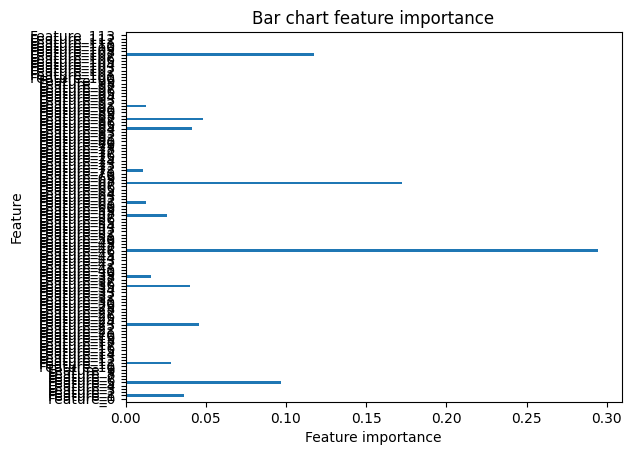

In [7]:
# Converting to DataFrame and setting column names
feature_names = [f'Feature_{i}' for i in range(X_task.shape[1])]  
X_train_task = pd.DataFrame(X_train_task, columns=feature_names)
X_test_task = pd.DataFrame(X_test_task, columns=feature_names)

#Making the function
def plot_feature_importances(classifier):
    n_features = X_train_task.shape[1]
    plt.barh(range(n_features), classifier.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), X_train_task.columns)
    plt.title("Bar chart feature importance")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

#Making the bar plots
plot_feature_importances(best_parameter)
plt.xlabel("Feature importance")



# Identifying important features
importances = best_parameter.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
important_features = feature_importance_df[feature_importance_df['Importance'] >= 0.1]

print("Important features with importance >= 0.1:")
print(important_features)


print('done')

# SVM

In [112]:
from sklearn.svm import SVC

if isinstance(X_task, pd.DataFrame) or isinstance(X_task, pd.Series):
    X_task = X_task.values
if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
    y = y.values


print('type:', type(X_task))  
# Dividing the data in a train and a test set
X_train_task, X_test_task, y_train_task, y_test_task = train_test_split(X_task, y, random_state=0, test_size=0.1)


svm = SVC()

param_grid_svm = {"C": [10, 100, 1000]}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_task, y_train_task)



print("Best parameter: {}".format(grid_search_svm.best_params_))
print("Best cross_validation score: {:.2f}".format(grid_search_svm.best_score_))
print("--------------------------------")

svm_result_task = grid_search_svm.score(X_test_task, y_test_task)

# Calculating the accuracy on both the training and test set
print("Accuracy on train set: {}".format(grid_search_svm.score(X_train_task, y_train_task)))
print("Accuracy on test set: {}".format(grid_search_svm.score(X_test_task, y_test_task)))
print("--------------------------------")

type: <class 'numpy.ndarray'>
Best parameter: {'C': 100}
Best cross_validation score: 0.90
--------------------------------
0.9318181818181818
Accuracy on train set: 0.9871134020618557
Accuracy on test set: 0.9318181818181818
--------------------------------


# Resting data

# Decision Tree

In [99]:
if isinstance(X_rest, pd.DataFrame) or isinstance(X_rest, pd.Series):
    X_rest = X_rest.values
if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
    y = y.values


print('type:', type(X_rest))  
# Dividing the data in a train and a test set
X_train_rest, X_test_rest, y_train_rest, y_test_rest = train_test_split(X_rest, y, random_state=0, test_size=0.1)


tree = DecisionTreeClassifier()

param_grid_tree = {"max_depth": [4, 5, 6, 7]}

grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_search_tree.fit(X_train_rest, y_train_rest)



print("Best parameter: {}".format(grid_search_tree.best_params_))
print("Best cross_validation score: {:.2f}".format(grid_search_tree.best_score_))
print("--------------------------------")

# Calculating the accuracy on both the training and test set
print("Accuracy on train set: {}".format(grid_search_tree.score(X_train_rest, y_train_rest)))
print("Accuracy on test set: {}".format(grid_search_tree.score(X_test_rest, y_test_rest)))
print("--------------------------------")

type: <class 'numpy.ndarray'>
Best parameter: {'max_depth': 5}
Best cross_validation score: 0.82
--------------------------------
Accuracy on train set: 0.961340206185567
Accuracy on test set: 0.8863636363636364
--------------------------------


# SVM

In [115]:
from sklearn.svm import SVC

if isinstance(X_rest, pd.DataFrame) or isinstance(X_rest, pd.Series):
    X_rest = X_rest.values
if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
    y = y.values


print('type:', type(X_rest))  
# Dividing the data in a train and a test set
X_train_rest, X_test_rest, y_train_rest, y_test_rest = train_test_split(X_rest, y, random_state=0, test_size=0.1)


svm = SVC()

param_grid_svm = {"C": [1, 100, 1000]}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_rest, y_train_rest)



print("Best parameter: {}".format(grid_search_svm.best_params_))
print("Best cross_validation score: {:.2f}".format(grid_search_svm.best_score_))
print("--------------------------------")

# Calculating the accuracy on both the training and test set
print("Accuracy on train set: {}".format(grid_search_svm.score(X_train_rest, y_train_rest)))
print("Accuracy on test set: {}".format(grid_search_svm.score(X_test_rest, y_test_rest)))
print("--------------------------------")



from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# Setting up for the confusion matrix/precision/f1-score
pred_grid_search_train = grid_search_svm.predict(X_train_rest)
pred_grid_search_test = grid_search_svm.predict(X_test_rest)

# Calculating precision
print("precision on train set: {:.2f}".format(precision_score(y_train_rest, pred_grid_search_train, average='micro', zero_division=1)))
print("precision on test set: {:.2f}".format(precision_score(y_test_rest, pred_grid_search_test, average='micro', zero_division=1)))
print("--------------------------------")

# Calculating recall
print("recall on train set: {:.2f}".format(recall_score(y_train_rest, pred_grid_search_train, average='micro', zero_division=1)))
print("recall on test set: {:.2f}".format(recall_score(y_test_rest, pred_grid_search_test, average='micro', zero_division=1)))
print("--------------------------------")

# Calculating the f1-score
print("f1-score on train set: {:.2f}".format(f1_score(y_train_rest, pred_grid_search_train, average="macro", zero_division=1)))
print("f1-score on test set: {:.2f}".format(f1_score(y_test_rest, pred_grid_search_test, average="macro", zero_division=1)))
print("--------------------------------")


type: <class 'numpy.ndarray'>
Best parameter: {'C': 1000}
Best cross_validation score: 0.90
--------------------------------
Accuracy on train set: 0.9922680412371134
Accuracy on test set: 0.9545454545454546
--------------------------------
precision on train set: 0.99
precision on test set: 0.95
--------------------------------
recall on train set: 0.99
recall on test set: 0.95
--------------------------------
f1-score on train set: 0.99
f1-score on test set: 0.93
--------------------------------
